# write looms from ctos

In [1]:
import loompy as lp
import glob
import os
import pickle
import matplotlib.pyplot as plt

%load_ext lab_black

In [2]:
cto_path_dict = {
    x.split("/")[-1].split("__")[0] + "." + x.split("/")[-1].split(".")[-2]: x
    for x in sorted(glob.glob("cistopic_objects_subsampled/*singlets.*k.pkl"))
}
cto_path_dict

{'BIO_ddseq_1.FIXEDCELLS.05k': 'cistopic_objects_subsampled/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.05k.pkl',
 'BIO_ddseq_1.FIXEDCELLS.15k': 'cistopic_objects_subsampled/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.15k.pkl',
 'BIO_ddseq_1.FIXEDCELLS.1k': 'cistopic_objects_subsampled/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.1k.pkl',
 'BIO_ddseq_1.FIXEDCELLS.25k': 'cistopic_objects_subsampled/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.25k.pkl',
 'BIO_ddseq_1.FIXEDCELLS.2k': 'cistopic_objects_subsampled/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.2k.pkl',
 'BIO_ddseq_1.FIXEDCELLS.3k': 'cistopic_objects_subsampled/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.3k.pkl',
 'BIO_ddseq_2.FIXEDCELLS.05k': 'cistopic_objects_subsampled/BIO_ddseq_2.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.05k.pkl',
 'BIO_ddseq_2.FIXEDCELLS.15k': 'cistopic_objects_subsampled/BIO_ddseq_2.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.15k.pkl',
 'BIO_ddseq_2.FIXEDCEL

In [3]:
loom_out = "cell_region_looms"
if not os.path.exists(os.path.join(loom_out)):
    os.makedirs(os.path.join(loom_out))

In [4]:
cto_path_sub_dict = {}
for sample in cto_path_dict.keys():
    cto_path = cto_path_dict[sample]
    loom_path = os.path.join(loom_out, cto_path.split("/")[-1].replace(".pkl", ".loom"))
    print(f"Checking if {loom_path} exist...")
    if os.path.exists(loom_path):
        print(f"\t{loom_path} exists! Skipping...")
    else:
        print(f"\t{loom_path} does not exist, adding to subdict to generate")
        cto_path_sub_dict[sample] = cto_path_dict[sample]

Checking if cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.05k.loom exist...
	cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.05k.loom exists! Skipping...
Checking if cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.15k.loom exist...
	cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.15k.loom exists! Skipping...
Checking if cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.1k.loom exist...
	cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.1k.loom exists! Skipping...
Checking if cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.25k.loom exist...
	cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.25k.loom exists! Skipping...
Checking if cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.2k.loom exist...
	cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.2k.loom exists! Skippi

In [5]:
for sample in cto_path_sub_dict.keys():
    cto_path = cto_path_sub_dict[sample]
    with open(cto_path, "rb") as f:
        cto = pickle.load(f)

    print(f"Loaded filtered cistopic object {sample}")
    loom_path = os.path.join(loom_out, cto_path.split("/")[-1].replace(".pkl", ".loom"))
    lp.create(
        filename=loom_path,
        layers=cto.fragment_matrix,
        row_attrs={"Gene": cto.region_names},
        col_attrs={"CellID": [x.split("__")[0] for x in cto.cell_names]},
    )
    print(f"Finished {loom_path} loom writing")

# write seurat scripts

In [6]:
!pwd

/lustre1/project/stg_00090/scatac_benchmark/fixedcells_5_cell_downsampling


In [7]:
scrub_name_suffix = "0-4"
frags_path_dict = {
    x.split("/")[-1].split(f".FIXEDCELLS.fragments.tsv.gz")[0]: x
    for x in sorted(
        glob.glob(f"../1_data_repository/fixedcells_fragments/*.fragments.tsv.gz")
    )
}
frags_path_dict

{'BIO_ddseq_1': '../1_data_repository/fixedcells_fragments/BIO_ddseq_1.FIXEDCELLS.fragments.tsv.gz',
 'BIO_ddseq_2': '../1_data_repository/fixedcells_fragments/BIO_ddseq_2.FIXEDCELLS.fragments.tsv.gz',
 'BIO_ddseq_3': '../1_data_repository/fixedcells_fragments/BIO_ddseq_3.FIXEDCELLS.fragments.tsv.gz',
 'BIO_ddseq_4': '../1_data_repository/fixedcells_fragments/BIO_ddseq_4.FIXEDCELLS.fragments.tsv.gz',
 'BRO_mtscatac_1': '../1_data_repository/fixedcells_fragments/BRO_mtscatac_1.FIXEDCELLS.fragments.tsv.gz',
 'BRO_mtscatac_2': '../1_data_repository/fixedcells_fragments/BRO_mtscatac_2.FIXEDCELLS.fragments.tsv.gz',
 'CNA_10xmultiome_1': '../1_data_repository/fixedcells_fragments/CNA_10xmultiome_1.FIXEDCELLS.fragments.tsv.gz',
 'CNA_10xmultiome_2': '../1_data_repository/fixedcells_fragments/CNA_10xmultiome_2.FIXEDCELLS.fragments.tsv.gz',
 'CNA_10xv11_1': '../1_data_repository/fixedcells_fragments/CNA_10xv11_1.FIXEDCELLS.fragments.tsv.gz',
 'CNA_10xv11_2': '../1_data_repository/fixedcells_fra

In [8]:
scrub_name_suffix = "0-4"
loom_path_dict = {
    x.split("/")[-1].split(f"__")[0] + "." + x.split("/")[-1].split(".")[-2]: x
    for x in sorted(glob.glob(f"cell_region_looms/*singlets.*k.loom"))
}
loom_path_dict

{'BIO_ddseq_1.FIXEDCELLS.05k': 'cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.05k.loom',
 'BIO_ddseq_1.FIXEDCELLS.15k': 'cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.15k.loom',
 'BIO_ddseq_1.FIXEDCELLS.1k': 'cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.1k.loom',
 'BIO_ddseq_1.FIXEDCELLS.25k': 'cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.25k.loom',
 'BIO_ddseq_1.FIXEDCELLS.2k': 'cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.2k.loom',
 'BIO_ddseq_1.FIXEDCELLS.3k': 'cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.3k.loom',
 'BIO_ddseq_2.FIXEDCELLS.05k': 'cell_region_looms/BIO_ddseq_2.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.05k.loom',
 'BIO_ddseq_2.FIXEDCELLS.15k': 'cell_region_looms/BIO_ddseq_2.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.15k.loom',
 'BIO_ddseq_2.FIXEDCELLS.1k': 'cell_region_looms/BIO_ddseq_2.FIXEDCELLS__cto.scrublet0-4.fmx.s

In [9]:
!cat ../0_resources/scripts/seurat_label_transfer_consensus.R

#!/usr/bin/env Rscript
library(Seurat)
library(SeuratDisk)
library(Signac)
# library(EnsDb.Hsapiens.v86)
library(ggplot2)
library(stringr)

args = commandArgs(trailingOnly=TRUE)
sample_id = args[1]
f_loom = args[2]
f_frag = args[3]
f_reference = args[4]
f_annotation = args[5]
f_out = args[6]

print(paste0("Processing sample ", args[1]))

# load pbmc object
# pbmc.rna <- readRDS("../0_resources/seurat_references/pbmc_integrated.RDS")
#pbmc.rna <- readRDS('/lustre1/project/stg_00090/scatac_benchmark/0_resources/seurat_references/pbmc_ssc_mat__integrated.rds')

################################################################################
# ATAC
################################################################################

### get data from loom:
atacloomcon <- Connect(filename = f_loom, mode = "r")
atacloomcon
atac_tmp <- as.Seurat(atacloomcon, assay='ATAC')
atacloomcon$close_all()

# subset by removing contig chromosomes
rawregions = rownames(GetAssayData(atac_tmp, slot = "counts",

In [10]:
loom_path_dict

{'BIO_ddseq_1.FIXEDCELLS.05k': 'cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.05k.loom',
 'BIO_ddseq_1.FIXEDCELLS.15k': 'cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.15k.loom',
 'BIO_ddseq_1.FIXEDCELLS.1k': 'cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.1k.loom',
 'BIO_ddseq_1.FIXEDCELLS.25k': 'cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.25k.loom',
 'BIO_ddseq_1.FIXEDCELLS.2k': 'cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.2k.loom',
 'BIO_ddseq_1.FIXEDCELLS.3k': 'cell_region_looms/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.3k.loom',
 'BIO_ddseq_2.FIXEDCELLS.05k': 'cell_region_looms/BIO_ddseq_2.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.05k.loom',
 'BIO_ddseq_2.FIXEDCELLS.15k': 'cell_region_looms/BIO_ddseq_2.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.15k.loom',
 'BIO_ddseq_2.FIXEDCELLS.1k': 'cell_region_looms/BIO_ddseq_2.FIXEDCELLS__cto.scrublet0-4.fmx.s

In [11]:
!pwd -P

/lustre1/project/stg_00090/scatac_benchmark/fixedcells_5_cell_downsampling


In [12]:
parallel_filename = "seurat_label_transfer.parallel"
script_path = "../0_resources/scripts/seurat_label_transfer_consensus.R"
img_path = "../0_resources/vsn_cache/cflerin-seurat-4.0.3-plus.sif"
reference_path = "../0_resources/seurat_references/pbmc_ref.rds"
annotation_path = "../0_resources/seurat_references/granges_annotation.rds"
# bind_mounts = "/dodrio,/readonly/dodrio,/tmp"
bind_mounts = "/lustre1,/staging,${VSC_SCRATCH}/tmp:/tmp"
bind_mounts = "/lustre1,/staging,${VSC_SCRATCH}/tmp:/tmp"

with open(parallel_filename, "w") as f:
    for sample in loom_path_dict.keys():
        supersample = sample.split(".")[0]
        outfile = f"cell_type_classification/{sample}__cell_type_seurat.txt"
        if not os.path.exists(outfile):
            loomfile = loom_path_dict[sample]
            fragfile = frags_path_dict[supersample]
            command = f"img_path={img_path} && singularity exec --cleanenv -B {bind_mounts} $img_path Rscript {script_path} {sample} {loomfile} {fragfile} {reference_path} {annotation_path} {outfile}"
            f.write(f"{command}\n")
            print(command)

        else:
            f.write(f"#{outfile} already exists!\n")
            print(f"#{outfile} already exists!")

#cell_type_classification/BIO_ddseq_1.FIXEDCELLS.05k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_1.FIXEDCELLS.15k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_1.FIXEDCELLS.1k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_1.FIXEDCELLS.25k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_1.FIXEDCELLS.2k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_1.FIXEDCELLS.3k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_2.FIXEDCELLS.05k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_2.FIXEDCELLS.15k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_2.FIXEDCELLS.1k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_2.FIXEDCELLS.25k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_2.FIXEDCELLS.2k__cell_type_seurat.txt already exists!
#cel

In [13]:
parallel_filename = "seurat_label_transfer.parallel"
script_path = "../0_resources/scripts/seurat_label_transfer_consensus.R"
img_path = "../0_resources/vsn_cache/cflerin-seurat-4.0.3-plus.sif"
reference_path = "../0_resources/seurat_references/pbmc_ref.rds"
annotation_path = "../0_resources/seurat_references/granges_annotation.rds"
# bind_mounts = "/dodrio,/readonly/dodrio,/tmp"
bind_mounts = "/lustre1,/staging,${VSC_SCRATCH}/tmp:/tmp"
bind_mounts = "/lustre1,/staging,${VSC_SCRATCH}/tmp:/tmp"

with open(parallel_filename, "w") as f:
    for sample in loom_path_dict.keys():
        supersample = sample.split(".")[0]
        outfile = f"cell_type_classification/{sample}__cell_type_seurat.txt"
        if not os.path.exists(outfile):
            loomfile = loom_path_dict[sample]
            fragfile = frags_path_dict[supersample]
            command = f"Rscript {script_path} {sample} {loomfile} {fragfile} {reference_path} {annotation_path} {outfile}"
            f.write(f"{command}\n")
            print(command)

        else:
            f.write(f"#{outfile} already exists!\n")
            print(f"#{outfile} already exists!")

#cell_type_classification/BIO_ddseq_1.FIXEDCELLS.05k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_1.FIXEDCELLS.15k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_1.FIXEDCELLS.1k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_1.FIXEDCELLS.25k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_1.FIXEDCELLS.2k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_1.FIXEDCELLS.3k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_2.FIXEDCELLS.05k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_2.FIXEDCELLS.15k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_2.FIXEDCELLS.1k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_2.FIXEDCELLS.25k__cell_type_seurat.txt already exists!
#cell_type_classification/BIO_ddseq_2.FIXEDCELLS.2k__cell_type_seurat.txt already exists!
#cel

# Run the Rscript

```
mkdir cell_type_classification
export OMP_THREAD_LIMIT=9
cat seurat_label_transfer.parallel | parallel -j 8 --progress
```

# Check results

In [14]:
import seaborn as sns
import pandas as pd

In [15]:
seurat_path_dict = {
    x.split("/")[-1].split("__")[0]: x
    for x in sorted(glob.glob("cell_type_classification/*.txt"))
}

In [16]:
depth_alias_dict = {
    "05k": 500,
    "1k": 1000,
    "15k": 1500,
    "2k": 2000,
    "25k": 2500,
    "3k": 3000,
}

In [17]:
df_merged = pd.DataFrame()
for sample, path in seurat_path_dict.items():
    print(sample)
    depth = sample.split(".")[-1]
    depth_alias = depth_alias_dict[depth]
    print(depth)
    df = pd.read_csv(path, sep="\t")
    df["depth"] = depth
    df["depth_alias"] = depth_alias
    df_merged = pd.concat([df_merged, df])

BIO_ddseq_1.FIXEDCELLS.05k
05k
BIO_ddseq_1.FIXEDCELLS.15k
15k
BIO_ddseq_1.FIXEDCELLS.1k
1k
BIO_ddseq_1.FIXEDCELLS.25k
25k
BIO_ddseq_1.FIXEDCELLS.2k
2k
BIO_ddseq_1.FIXEDCELLS.3k
3k
BIO_ddseq_2.FIXEDCELLS.05k
05k
BIO_ddseq_2.FIXEDCELLS.15k
15k
BIO_ddseq_2.FIXEDCELLS.1k
1k
BIO_ddseq_2.FIXEDCELLS.25k
25k
BIO_ddseq_2.FIXEDCELLS.2k
2k
BIO_ddseq_2.FIXEDCELLS.3k
3k
BIO_ddseq_3.FIXEDCELLS.05k
05k
BIO_ddseq_3.FIXEDCELLS.15k
15k
BIO_ddseq_3.FIXEDCELLS.1k
1k
BIO_ddseq_3.FIXEDCELLS.25k
25k
BIO_ddseq_3.FIXEDCELLS.2k
2k
BIO_ddseq_4.FIXEDCELLS.05k
05k
BIO_ddseq_4.FIXEDCELLS.15k
15k
BIO_ddseq_4.FIXEDCELLS.1k
1k
BIO_ddseq_4.FIXEDCELLS.25k
25k
BIO_ddseq_4.FIXEDCELLS.2k
2k
BRO_mtscatac_1.FIXEDCELLS.05k
05k
BRO_mtscatac_1.FIXEDCELLS.15k
15k
BRO_mtscatac_1.FIXEDCELLS.1k
1k
BRO_mtscatac_1.FIXEDCELLS.25k
25k
BRO_mtscatac_1.FIXEDCELLS.2k
2k
BRO_mtscatac_1.FIXEDCELLS.3k
3k
BRO_mtscatac_2.FIXEDCELLS.05k
05k
BRO_mtscatac_2.FIXEDCELLS.15k
15k
BRO_mtscatac_2.FIXEDCELLS.1k
1k
BRO_mtscatac_2.FIXEDCELLS.25k
25k
BRO_mt

In [18]:
df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample_id"]]

In [19]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

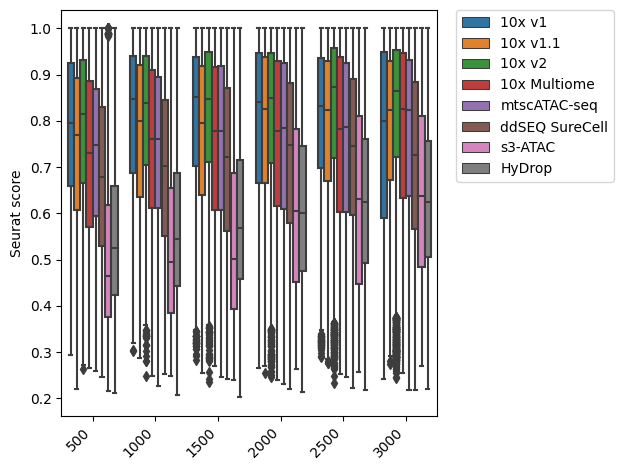

In [20]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged,
    y="cell_type_pred_score",
    x="depth_alias",
    hue="tech",
    hue_order=tech_order,
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Seurat score")
plt.xlabel("")
# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels_alias = [cell_type_alias_dict[x] for x in labels]
# ax.set_xticklabels(labels_alias)


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)
plt.tight_layout()

plt.savefig(
    "plts_final/FIXEDCELLS_seurat_scores_celldownsampled.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS_seurat_scores_celldownsampled.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

In [21]:
plt.savefig(
    "plts_final/FIXEDCELLS__top2k_DARs_logfc.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__top2k_DARs_logfc.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='tech', ylabel='cell_type_pred_score'>

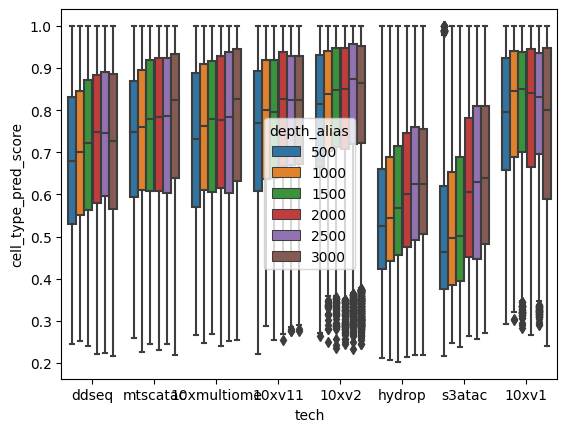

In [22]:
sns.boxplot(df_merged, y="cell_type_pred_score", x="tech", hue="depth_alias")

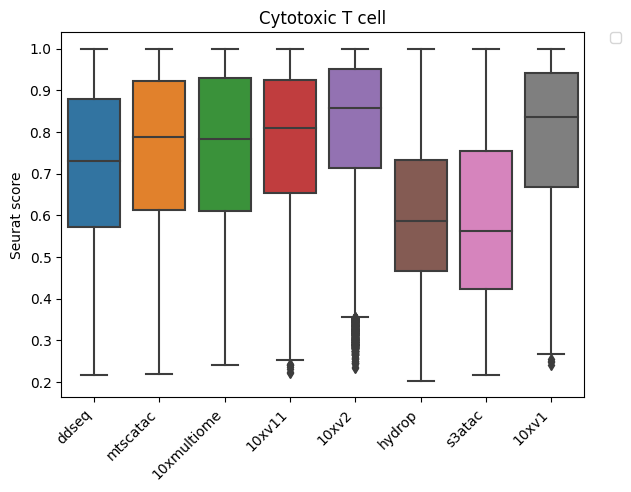

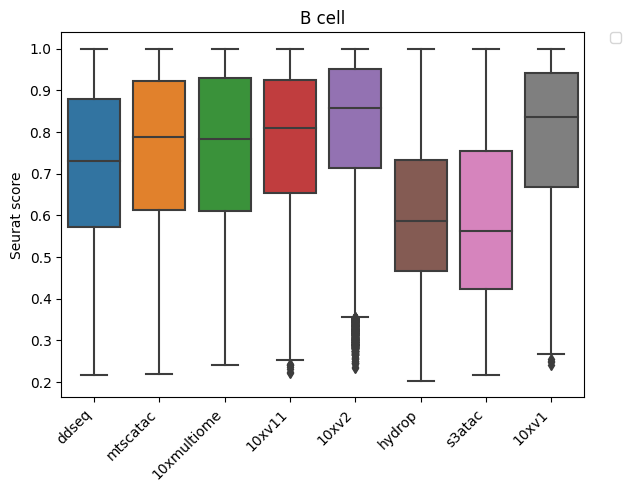

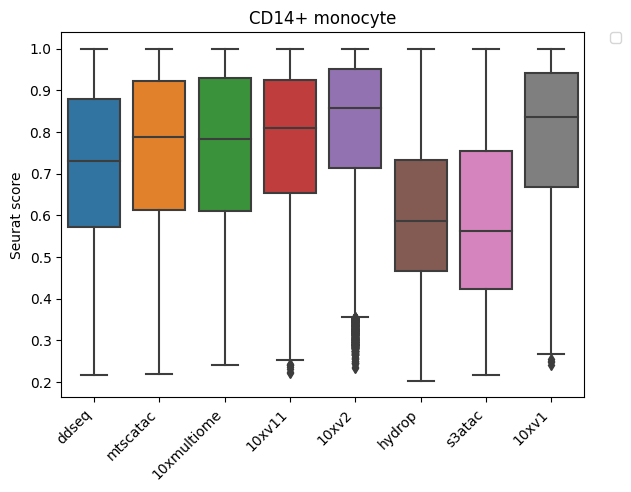

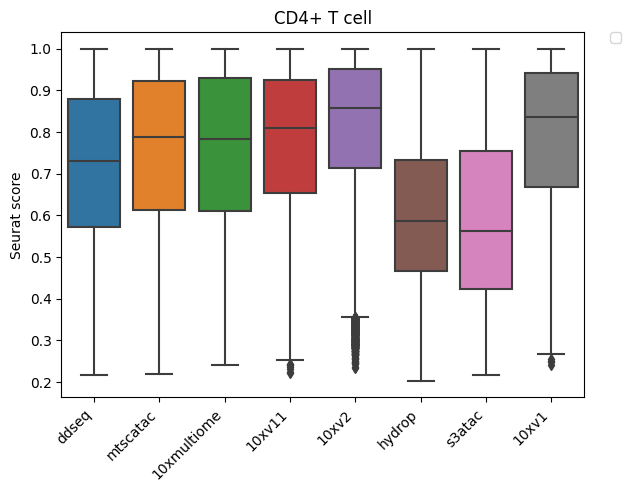

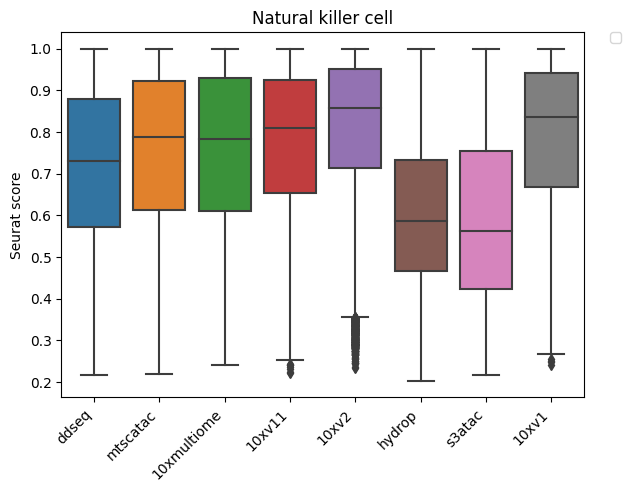

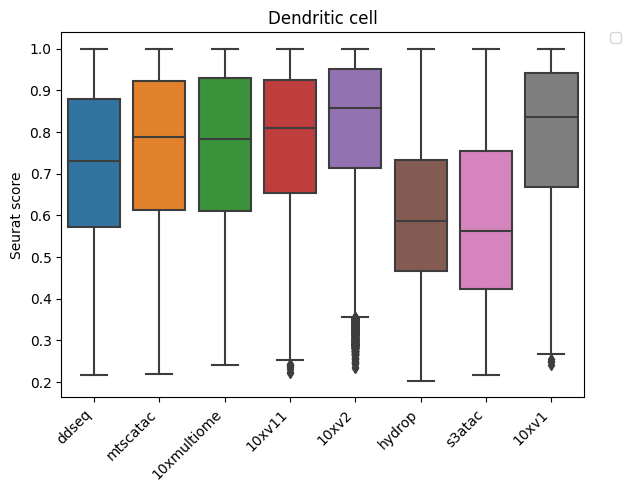

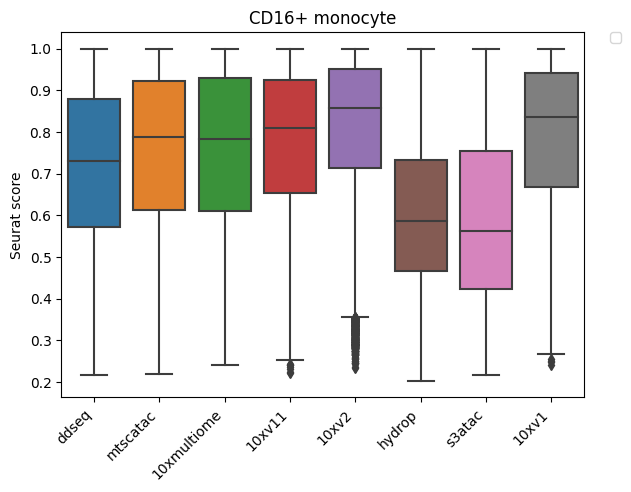

In [23]:
for cell_type in df_merged["cell_type"].unique():
    df_tmp = df_merged[df_merged["cell_type"] == cell_type]
    fig, ax = plt.subplots()
    sns.boxplot(
        df_merged,
        y="cell_type_pred_score",
        x="tech",
    )

    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Seurat score")
    plt.xlabel("")
    # labels = [item.get_text() for item in ax.get_xticklabels()]
    # labels_alias = [cell_type_alias_dict[x] for x in labels]
    # ax.set_xticklabels(labels_alias)

    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(
        handles[0 : len(tech_order)],
        [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
        bbox_to_anchor=(1.05, 1),
        loc=2,
        borderaxespad=0.0,
    )
    plt.tight_layout()
    plt.title(cell_type)

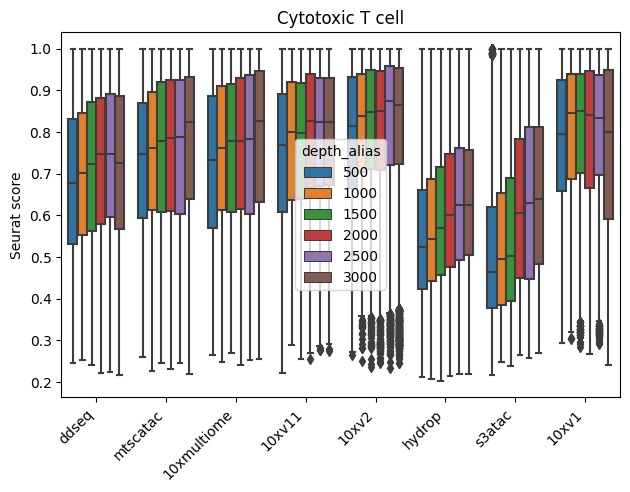

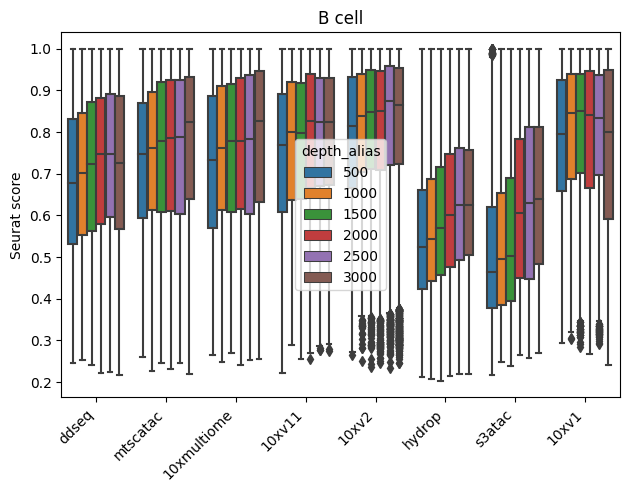

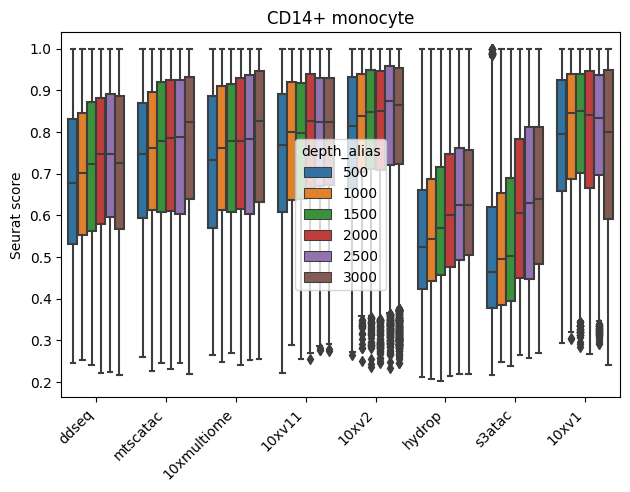

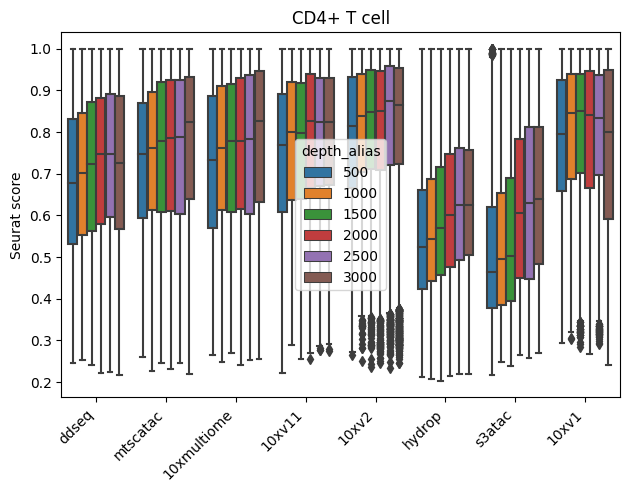

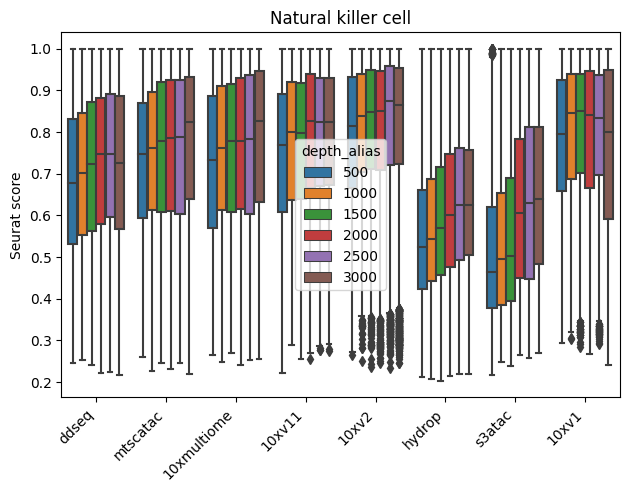

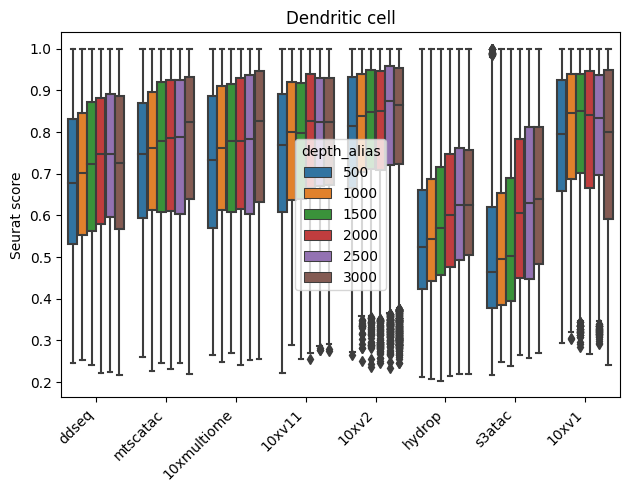

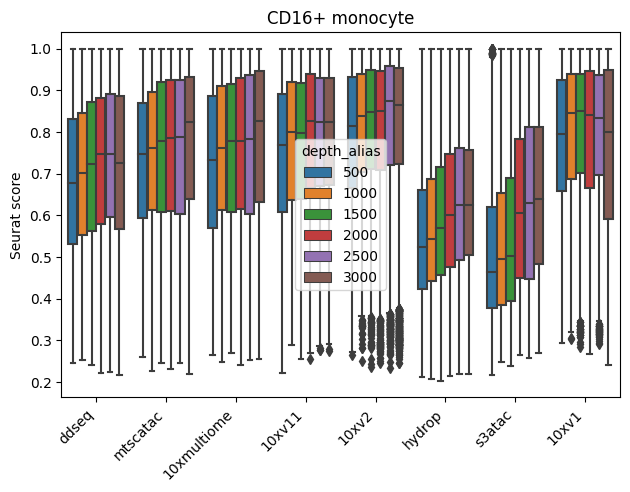

In [24]:
for cell_type in df_merged["cell_type"].unique():
    df_tmp = df_merged[df_merged["cell_type"] == cell_type]
    fig, ax = plt.subplots()
    sns.boxplot(
        df_merged,
        y="cell_type_pred_score",
        x="tech",
        hue="depth_alias",
        # hue_order=tech_order,
    )

    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Seurat score")
    plt.xlabel("")
    # labels = [item.get_text() for item in ax.get_xticklabels()]
    # labels_alias = [cell_type_alias_dict[x] for x in labels]
    # ax.set_xticklabels(labels_alias)

    handles, labels = ax.get_legend_handles_labels()

    plt.tight_layout()
    plt.title(cell_type)

<AxesSubplot: xlabel='cell_type', ylabel='cell_type_pred_score'>

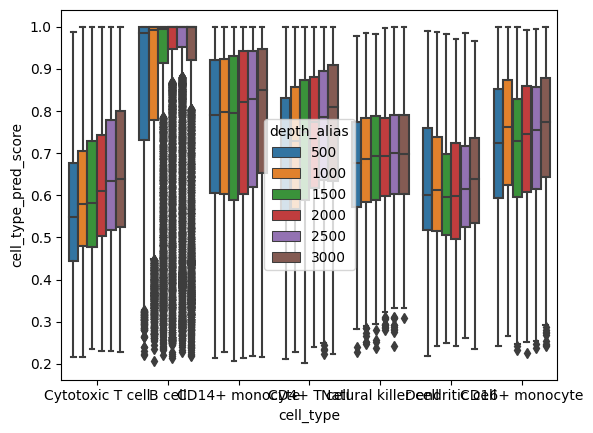

In [25]:
sns.boxplot(df_merged, y="cell_type_pred_score", x="cell_type", hue="depth_alias")

## lineplot

In [26]:
df_merged["supersample"] = [".".join(x.split(".")[:2]) for x in df_merged["sample_id"]]

In [27]:
df_merged_pivot = df_merged.pivot_table(
    columns="depth",
    index="supersample",
    values="cell_type_pred_score",
    aggfunc="median",
)

In [28]:
df_merged_stacked = df_merged_pivot.stack().reset_index()

In [29]:
df_merged_stacked.columns = ["sample", "depth", "seurat"]

In [30]:
df_merged_stacked["depth_int"] = [
    depth_alias_dict[x] for x in df_merged_stacked["depth"]
]

In [31]:
df_merged_stacked["tech"] = [x.split("_")[1] for x in df_merged_stacked["sample"]]

<AxesSubplot: xlabel='depth_int', ylabel='seurat'>

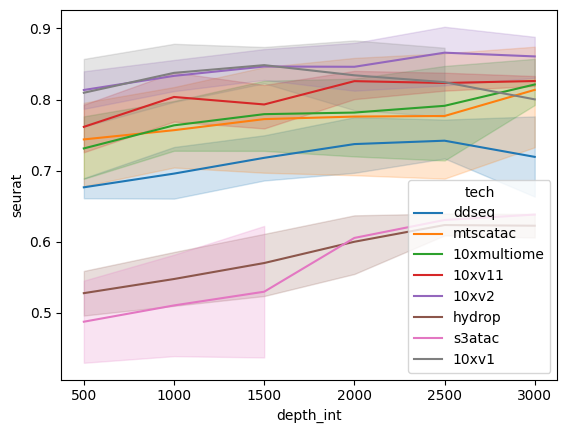

In [32]:
sns.lineplot(df_merged_stacked, x="depth_int", y="seurat", hue="tech")

In [33]:
df_merged_stacked

,sample,depth,seurat,depth_int,tech
0,BIO_ddseq_1.FIXEDCELLS,05k,0.675524,500,ddseq
1,BIO_ddseq_1.FIXEDCELLS,15k,0.686963,1500,ddseq
2,BIO_ddseq_1.FIXEDCELLS,1k,0.673260,1000,ddseq
3,BIO_ddseq_1.FIXEDCELLS,25k,0.723332,2500,ddseq
4,BIO_ddseq_1.FIXEDCELLS,2k,0.702199,2000,ddseq
...,...,...,...,...,...
225,VIB_hydrop_2.FIXEDCELLS,05k,0.556996,500,hydrop
226,VIB_hydrop_2.FIXEDCELLS,15k,0.570064,1500,hydrop
227,VIB_hydrop_2.FIXEDCELLS,1k,0.583844,1000,hydrop
228,VIB_hydrop_2.FIXEDCELLS,25k,0.599643,2500,hydrop


In [34]:
df_medians = (
    df_merged_stacked.groupby(["sample", "depth"])["seurat"].median().reset_index()
)
df_medians["depth_int"] = [depth_alias_dict[x] for x in df_medians["depth"]]
df_medians["tech"] = [x.split("_")[1] for x in df_medians["sample"]]

<AxesSubplot: xlabel='depth_int', ylabel='seurat'>

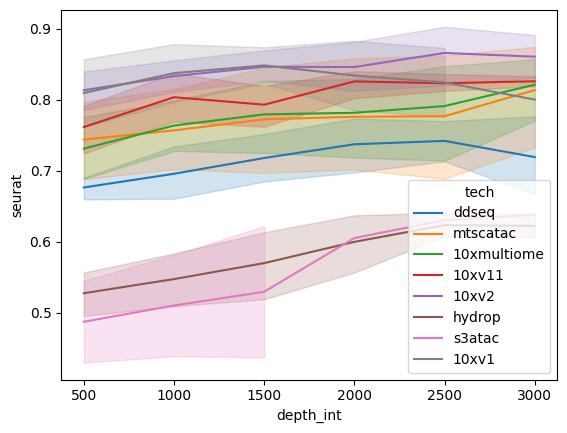

In [35]:
sns.lineplot(df_medians, x="depth_int", y="seurat", hue="tech")

# groupby

In [36]:
cell_type_order = [
    "B_cell",
    "CD14+_monocyte",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Dendritic_cell",
    "Natural_killer_cell",
    "CD16+_monocyte",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1 (Control)",
    "10xv2": "10x v2",
    "ddseq": "Bio-Rad ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "mtscatacfacs": "mtscATAC-seq (FACS)",
    "s3atac": "s3-ATAC",
}

tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_alias_color_palette = {
    "10x v2": "#1b9e77",
    "10x v1": "#d95f02",
    "10x v1.1": "#7570b3",
    "10x v1.1 (Control)": "#7570b3",
    "10x Multiome": "#e7298a",
    "mtscATAC-seq": "#66a61e",
    "mtscATAC-seq (FACS)": "#66a61e",
    "Bio-Rad ddSEQ SureCell": "#e6ab02",
    "s3-ATAC": "#a6761d",
    "HyDrop": "#666666",
}

tech_alias_order = [
    "10x v1",
    "10x v1.1",
    "10x v1.1 (Control)",
    "10x v2",
    "10x Multiome",
    "mtscATAC-seq",
    "mtscATAC-seq (FACS)",
    "Bio-Rad ddSEQ SureCell",
    "s3-ATAC",
    "HyDrop",
]

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "Naive T cells",
    "Cytotoxic_T_cell": "Cytotoxic T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

dashes_alias_dict = {
    "10x v1": "",
    "10x v1.1": "",
    "10x v1.1 (Control)": (2, 1),
    "10x v2": "",
    "10x Multiome": "",
    "mtscATAC-seq": "",
    "mtscATAC-seq (FACS)": (2, 1),
    "Bio-Rad ddSEQ SureCell": "",
    "ddSEQ SureCell": "",
    "s3-ATAC": "",
    "HyDrop": "",
}

In [37]:
samples_passing = [
    "BIO_ddseq_1",
    "BIO_ddseq_2",
    "BIO_ddseq_3",
    "BIO_ddseq_4",
    "BRO_mtscatacfacs_1",
    "BRO_mtscatacfacs_2",
    "CNA_10xmultiome_1",
    "CNA_10xmultiome_2",
    "CNA_10xv11_1",
    "CNA_10xv11_2",
    "CNA_10xv11_3",
    "CNA_10xv2_1",
    "CNA_10xv2_2",
    "CNA_mtscatac_1",
    "EPF_hydrop_1",
    "EPF_hydrop_2",
    "EPF_hydrop_3",
    "EPF_hydrop_4",
    "HAR_ddseq_1",
    "HAR_ddseq_2",
    "MDC_mtscatac_1",
    "MDC_mtscatac_2",
    "OHS_s3atac_1",
    "SAN_10xmultiome_1",
    "SAN_10xmultiome_2",
    "TXG_10xv11_1",
    "TXG_10xv2_1",
    "TXG_10xv2_2",
    "UCS_ddseq_1",
    "UCS_ddseq_2",
    "VIB_10xv1_1",
    "VIB_10xv1_2",
    "VIB_10xv2_1",
    "VIB_10xv2_2",
    "VIB_hydrop_2",
]

In [38]:
df_merged["sample_id"] = [
    x.replace("CNA_10xv11_4", "CNA_10xv11c_1")
    .replace("CNA_10xv11_5", "CNA_10xv11c_2")
    .replace("BRO_mtscatac", "BRO_mtscatacfacs")
    for x in df_merged["sample_id"]
]
df_merged["supersample"] = [x.split(".")[0] for x in df_merged["sample_id"]]
df_merged["depth_int"] = [depth_alias_dict[x] for x in df_merged["depth"]]
df_merged["tech"] = [x.split("_")[1] for x in df_merged["supersample"]]

In [39]:
df_merged

,composite_sample_id,barcode,sample_id,cell_type,cell_type_pred_score,cell_type_hiconf_70,depth,depth_alias,tech,supersample,depth_int
0,AACCACATTCTGCAACGTTGG_CAGAATTGTGCATTTGGAAGG_TC...,AACCACATTCTGCAACGTTGG_CAGAATTGTGCATTTGGAAGG_TC...,BIO_ddseq_1.FIXEDCELLS.05k,Cytotoxic T cell,0.484663,Unknown,05k,500,ddseq,BIO_ddseq_1,500
1,CGTTTGATCGCGCACTAACTC_GGAGCCTATGAATAGCACAGC_TC...,CGTTTGATCGCGCACTAACTC_GGAGCCTATGAATAGCACAGC_TC...,BIO_ddseq_1.FIXEDCELLS.05k,B cell,0.940387,B cell,05k,500,ddseq,BIO_ddseq_1,500
2,AGAGACCTCGTTCTAGGACGT_CGATGCATGCGAGCGGTAACA_CT...,AGAGACCTCGTTCTAGGACGT_CGATGCATGCGAGCGGTAACA_CT...,BIO_ddseq_1.FIXEDCELLS.05k,CD14+ monocyte,0.527330,Unknown,05k,500,ddseq,BIO_ddseq_1,500
3,GAATATGGTTGATGACCGGCT_GTTGATGGTTAGGAAACTCTT_TC...,GAATATGGTTGATGACCGGCT_GTTGATGGTTAGGAAACTCTT_TC...,BIO_ddseq_1.FIXEDCELLS.05k,CD4+ T cell,0.726744,CD4+ T cell,05k,500,ddseq,BIO_ddseq_1,500
4,CCTATGTACTCAATATTATTC_GATCACCGTGGTAGAATTCCA_GC...,CCTATGTACTCAATATTATTC_GATCACCGTGGTAGAATTCCA_GC...,BIO_ddseq_1.FIXEDCELLS.05k,CD4+ T cell,0.768395,CD4+ T cell,05k,500,ddseq,BIO_ddseq_1,500
...,...,...,...,...,...,...,...,...,...,...,...
1995,ATGGCATAGGGACGGCTTCA-1-VIB_hydrop_2.FIXEDCELLS.2k,ATGGCATAGGGACGGCTTCA-1,VIB_hydrop_2.FIXEDCELLS.2k,CD14+ monocyte,0.698750,Unknown,2k,2000,hydrop,VIB_hydrop_2,2000
1996,ACTGCCTTGACATCAAGCTG-1-VIB_hydrop_2.FIXEDCELLS.2k,ACTGCCTTGACATCAAGCTG-1,VIB_hydrop_2.FIXEDCELLS.2k,Cytotoxic T cell,0.581225,Unknown,2k,2000,hydrop,VIB_hydrop_2,2000
1997,TCGATATGCGACAACAGGAA-1-VIB_hydrop_2.FIXEDCELLS.2k,TCGATATGCGACAACAGGAA-1,VIB_hydrop_2.FIXEDCELLS.2k,CD14+ monocyte,0.622877,Unknown,2k,2000,hydrop,VIB_hydrop_2,2000
1998,ATCAGACCGCGTTGGACATA-2-VIB_hydrop_2.FIXEDCELLS.2k,ATCAGACCGCGTTGGACATA-2,VIB_hydrop_2.FIXEDCELLS.2k,Cytotoxic T cell,0.370122,Unknown,2k,2000,hydrop,VIB_hydrop_2,2000


In [40]:
df_merged_sub = df_merged[df_merged["supersample"].isin(samples_passing)]

In [41]:
df_merged_sub = df_merged_sub[df_merged_sub["depth_int"] <= 2500]

In [42]:
sns.set_context("notebook")

In [43]:
df_merged_means = (
    df_merged_sub.groupby(["tech", "depth", "cell_type"]).median().reset_index()
)
df_merged_means.index = df_merged_means["tech"] + "." + df_merged_means["depth"]
df_merged_means["tech_alias"] = [tech_alias_dict[x] for x in df_merged_means["tech"]]
df_merged_means = df_merged_means.sort_values("depth_int")

/tmp/ipykernel_2473298/370374895.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_merged_sub.groupby(["tech", "depth", "cell_type"]).median().reset_index()


In [44]:
df_merged_means["tech"].unique()

array(['10xmultiome', 'hydrop', 'mtscatac', '10xv2', '10xv1', '10xv11',
       'ddseq', 's3atac', 'mtscatacfacs'], dtype=object)

In [45]:
cell_type_alias_order = [cell_type_alias_dict[x] for x in cell_type_order]
cell_type_alias_order

['B cells',
 'CD14+ monocytes',
 'Naive T cells',
 'Cytotoxic T cells',
 'Dendritic cells',
 'NK cells',
 'CD16+ monocytes']

In [46]:
df_merged_means["cell_type"] = [
    (x + "s")
    .replace("ss", "s")
    .replace("ss", "s")
    .replace("CD4+ T cells", "Naive T cells")
    for x in df_merged_means["cell_type"]
]

In [47]:
cell_type_alias_order = [
    "B cells",
    "CD14+ monocytes",
    "Naive T cells",
    "Cytotoxic T cells",
    "Dendritic cells",
    "Natural killer cells",
    "CD16+ monocytes",
]

In [48]:
df_merged_means["cell_type"].unique()

array(['B cells', 'CD14+ monocytes', 'CD16+ monocytes', 'Naive T cells',
       'Cytotoxic T cells', 'Dendritic cells', 'Natural killer cells'],
      dtype=object)

B cells
CD14+ monocytes
Naive T cells
Cytotoxic T cells
Dendritic cells
Natural killer cells
CD16+ monocytes


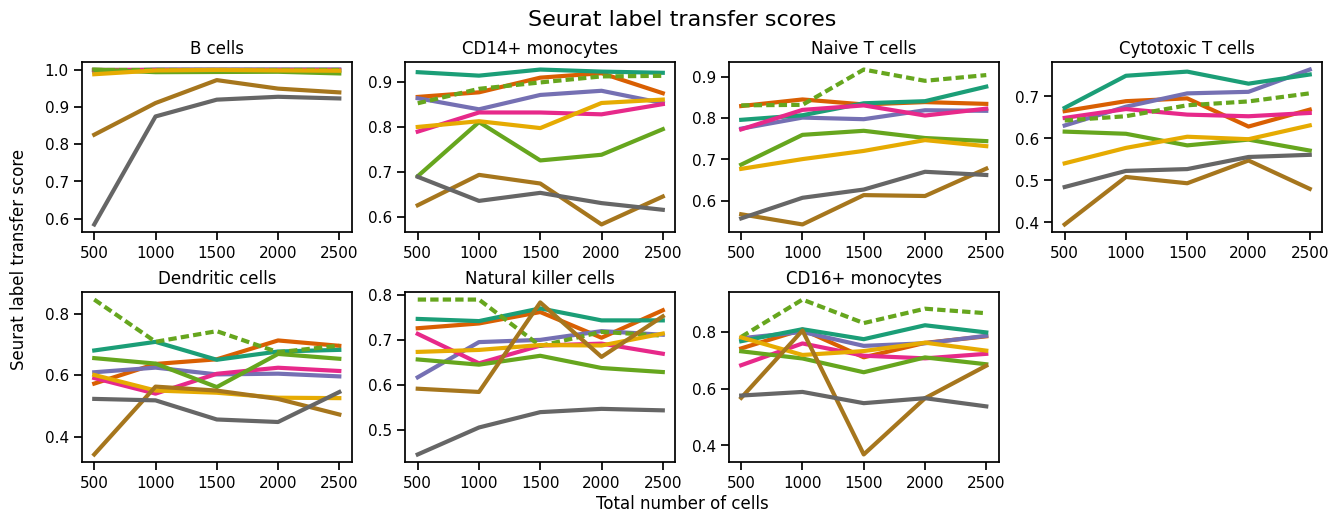

In [50]:
base_size = 4
n_cols = 4
n_rows = 2
fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(base_size * n_cols, base_size * n_rows * 0.65),
    # sharey=True,
    # sharex=True,
)
fig.subplots_adjust(hspace=0.35)
# fig.subplots_adjust(wspace=0.2)
fontsize_large = 18
for cell_type in cell_type_alias_order:
    print(cell_type)
    ax = axes.flatten()[cell_type_alias_order.index(cell_type)]
    # print(cell_type_alias_order.index(cell_type))
    df_tmp = df_merged_means[df_merged_means["cell_type"] == cell_type]
    # print(df_tmp)

    sns.lineplot(
        data=df_tmp,
        x="depth_int",
        y="cell_type_pred_score",
        hue="tech_alias",
        hue_order=tech_alias_order,
        style="tech_alias",
        dashes=dashes_alias_dict,
        ax=ax,
        palette=tech_alias_color_palette,
        linewidth=3,
        sort=False,
    )

    ax.set_ylabel(None)

    ax.set_title(cell_type)
    if cell_type != cell_type_order[-1]:
        ax.get_legend().remove()

    if cell_type == cell_type_order[-1]:
        leg = ax.legend()
        for i in leg.legendHandles:
            i.set_linewidth(3)

        ax.legend(
            loc="upper left",
            bbox_to_anchor=(1.04, 1),
        )

        # ax.legend(
        #     loc="upper right",
        #     bbox_to_anchor=(1, -0.15),
        #     fancybox=False,
        #     shadow=False,
        #     ncol=len(tech_alias_order),
        #     handleheight=3,
        # )

    # ax.set_xlabel("Read depth (k/cell)", fontsize=14)
    ax.set_xlabel("")

for ax in axes.flatten():
    if not ax.lines:
        ax.set_axis_off()

    # ax.set_ylim([0.3, 1.1])

fig.suptitle("Seurat label transfer scores", fontsize=16)
fig.text(0.5, 0.02, "Total number of cells", ha="center", fontsize=12)
fig.text(
    0.08,
    0.5,
    "Seurat label transfer score",
    va="center",
    rotation="vertical",
    fontsize=12,
)
# fig.delaxes(axes[1][-1])
# ax.get_legend()
# plt.tight_layout()

plt.savefig("plts/seurat_dependency_2500min.svg", dpi=600, facecolor="w")
plt.savefig("plts/seurat_dependency_2500min.png", dpi=600, facecolor="w")

plt.show()

In [51]:
selected_celltypes = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
]
selected_celltypes_alias = [cell_type_alias_dict[x] for x in selected_celltypes]
selected_celltypes_alias = [
    "B cells",
    "Naive T cells",
    "Cytotoxic T cells",
    "Natural killer cells",
]

B cells
Naive T cells
Cytotoxic T cells
Natural killer cells


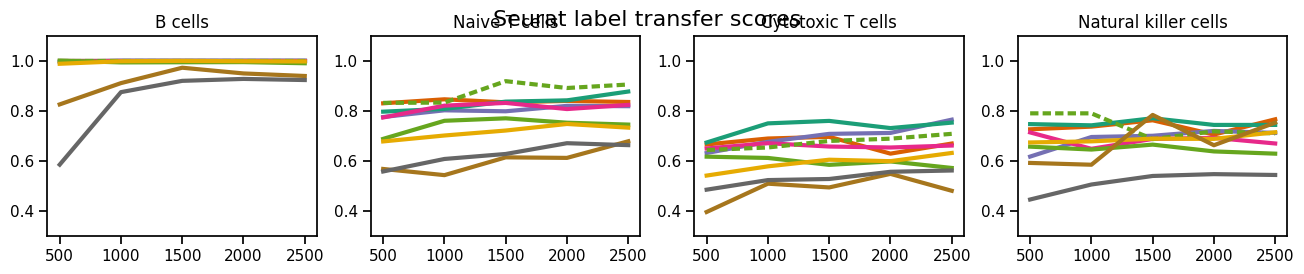

In [52]:
base_size = 4
n_cols = 4
n_rows = 1
fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(base_size * n_cols, base_size * n_rows * 0.65),
    # sharey=True,
    # sharex=True,
)
fig.subplots_adjust(hspace=0.35)
# fig.subplots_adjust(wspace=0.2)
fontsize_large = 18
for cell_type in selected_celltypes_alias:
    print(cell_type)
    ax = axes.flatten()[selected_celltypes_alias.index(cell_type)]
    # print(cell_type_alias_order.index(cell_type))
    df_tmp = df_merged_means[df_merged_means["cell_type"] == cell_type]
    # print(df_tmp)

    sns.lineplot(
        data=df_tmp,
        x="depth_int",
        y="cell_type_pred_score",
        hue="tech_alias",
        hue_order=tech_alias_order,
        style="tech_alias",
        dashes=dashes_alias_dict,
        ax=ax,
        palette=tech_alias_color_palette,
        linewidth=3,
        sort=False,
    )

    ax.set_ylabel(None)

    ax.set_title(cell_type)
    if cell_type != cell_type_order[-1]:
        ax.get_legend().remove()

    if cell_type == cell_type_order[-1]:
        leg = ax.legend()
        for i in leg.legendHandles:
            i.set_linewidth(3)

        ax.legend(
            loc="upper left",
            bbox_to_anchor=(1.04, 1),
        )

        # ax.legend(
        #     loc="upper right",
        #     bbox_to_anchor=(1, -0.15),
        #     fancybox=False,
        #     shadow=False,
        #     ncol=len(tech_alias_order),
        #     handleheight=3,
        # )

    # ax.set_xlabel("Read depth (k/cell)", fontsize=14)
    ax.set_xlabel("")

for ax in axes.flatten():
    if not ax.lines:
        ax.set_axis_off()

    ax.set_ylim([0.3, 1.1])

fig.suptitle("Seurat label transfer scores", fontsize=16)
# fig.text(0.5, 0.02, "Total number of cells", ha="center", fontsize=12)
# fig.text(
#     0.08,
#     0.5,
#     "Seurat label transfer score",
#     va="center",
#     rotation="vertical",
#     fontsize=12,
# )
# fig.delaxes(axes[1][-1])
# ax.get_legend()
# plt.tight_layout()

plt.savefig("plts/seurat_dependency_2500min_selectedcells.svg", dpi=600, facecolor="w")
plt.savefig("plts/seurat_dependency_2500min_selectedcells.png", dpi=600, facecolor="w")

plt.show()